In [10]:
import numpy as np
import mahotas
import json
import cv2
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
from skimage.transform import resize
from PIL import Image

In [11]:
DATASET_FOLDER = "/Users/jiehyun/kaggle/input/hubmap-organ-segmentation/"
TRAIN_IMAGES = DATASET_FOLDER + "train_images"
TRAIN_ANNOT = DATASET_FOLDER + "train_annotations"
TRAIN_CSV = DATASET_FOLDER + "train.csv"
train_df = pd.read_csv(TRAIN_CSV)
binary_masks = DATASET_FOLDER + "binary_masks"
OUTPUT_FOLDER = "/Users/jiehyun/kaggle/output/"
IMG_NPZ = OUTPUT_FOLDER + 'img_npz'
MASK_NPZ = OUTPUT_FOLDER + 'mask_npz'

In [12]:
len(train_df['id'])

351

In [17]:
from numpy import asarray

In [95]:
# base path of the dataset
DATASET_PATH = "/Users/jiehyun/kaggle/"
# define the path to the images and masks dataset
IMAGE_DATASET_PATH = DATASET_PATH + "input/hubmap-organ-segmentation/train_images"
MASK_DATASET_PATH = DATASET_PATH + "input/hubmap-organ-segmentation/binary_masks"

In [62]:
output_shape = (512, 512)
img = Image.open(IMAGE_DATASET_PATH + '/62.tiff')
img = img.resize(output_shape)
loadedimages = asarray(img)


In [63]:
loadedimages.shape

(512, 512, 3)

In [78]:
#plt.rcParams.update({'figure.max_open_warning': 0})
#plt.rcParams['figure.max_open_warning'] = 1000
plt.rc('figure', max_open_warning = 0)

In [79]:
#reference1: https://github.com/maftouni/binary_mask_from_json/blob/main/binary_mask_from_json.py
#reference2: https://www.kaggle.com/code/soymilkk/hubmap-unet

for i in range(len(train_df['id'])):
    idx = random.randint(0, len(train_df) - 1)
    img_id = train_df['id'][idx]
    file_dir = os.path.join(DATASET_FOLDER, f'binary_masks/{img_id}.png')
    if f'{img_id}.png' not in binary_masks:
        img_path = os.path.join(DATASET_FOLDER, f'train_images/{img_id}.tiff')
        img = cv2.imread(img_path)
    
    with open(os.path.join(DATASET_FOLDER, f'train_annotations/{img_id}.json')) as json_file:
        data = json.load(json_file)

    x_val = []
    y_val = []
    for i in range(len(data)):
        for j in range(len(data[i])):        
            shape1_x=data[i][j][0]
            shape1_y=data[i][j][1]
            x_val.append(shape1_x)
            y_val.append(shape1_y)

    fig = plt.figure()

    # normalize the data to 0 - 1
    #plt.imshow(img.astype(np.uint8)) 
    #plt.scatter(x_val, y_val, zorder=2, color='red', marker = '.', alpha= 0.2)

    mask = np.zeros((img.shape[0],img.shape[1]))
    for i in range(len(data)):
        img2=cv2.drawContours(mask, [np.array(data[i])], -1, (255, 255, 255), -1)

    output_shape = (512, 512)
    resized_img = resize(img, output_shape)
    resized_mask = resize(img2, output_shape)

    #os.chdir(binary_masks)

    #check img with mask
    #plt.imshow(img, )
    #plt.imshow(img2, alpha = 0.5)
    #plt.show()

    #make it png file to check the result
    #file_dir = os.path.join(DATASET_FOLDER, f'binary_masks/{img_id}.png')
    #cv2.imwrite(file_dir, img2) 
    #plt.close('all')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [68]:
resized_img.shape

(512, 512, 3)

In [74]:
resized_img.flatten()

array([0.95249089, 0.9576278 , 0.95652011, ..., 0.94914178, 0.95273499,
       0.95437255])

In [69]:
resized_mask.shape

(512, 512)

In [70]:
mask.shape

(3000, 3000)

In [6]:
print(img2[1000:1500,1000:1500])

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [7]:
img2.max()

255.0

In [236]:
img2.astype(np.bool)

/var/folders/w2/kjqd2k2x70z1qwx2jy2y7j580000gn/T/ipykernel_56204/701570927.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img2.astype(np.bool)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

/var/folders/w2/kjqd2k2x70z1qwx2jy2y7j580000gn/T/ipykernel_79144/2608287139.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(img2.astype(np.bool))


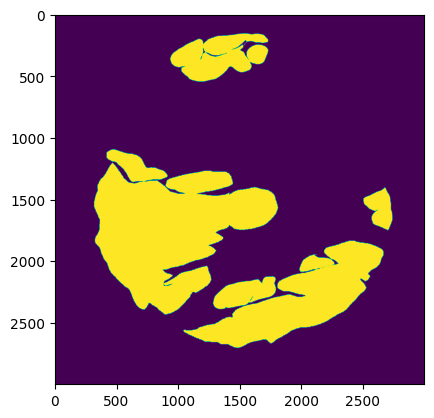

In [8]:
plt.imshow(img2.astype(np.bool))

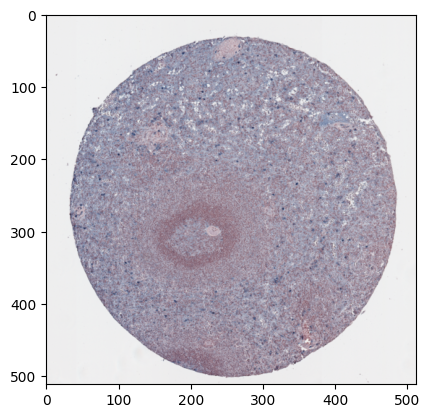

In [85]:
plt.imshow(resized_img)

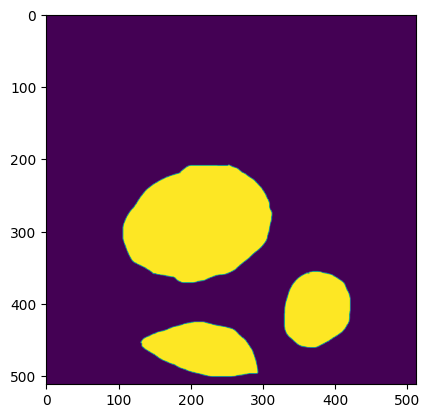

In [86]:
plt.imshow(resized_mask)

In [87]:
# 하나의 파일 save하는 방법 
np.save(IMG_NPZ, resized_img)

In [88]:
np.save(MASK_NPZ,resized_mask)

In [89]:
resized_img.shape

(512, 512, 3)

In [90]:
resized_mask.shape

(512, 512)

In [16]:
cv2.imwrite('/Users/jiehyun/Jenna/UMassBoston/2022_Fall/CS696/01/mask.png', resized_mask) 

True

In [17]:
np.save('pal_img.npy',resized_img)
np.save('pal_mask.npy',resized_mask)


In [24]:
from PIL import Image

In [40]:
#def put_pal():
'''
palette : 1d array - 3*256(768)size
ex) array([  0,   0,   0, 128,   0,   0,   0, 128,   0, 128, 128,   0,  ...])
'''
#palette = np.load('pal_mask.npy')    # load palette
#palette = [0, 0, 0, 102, 102, 102, 176, 176, 176, 255, 255, 255]
# or define the palette manually
# ex) palette = [0,0,0 , 128,0,0 , 0,128,0 , ...]
mask = Image.open('mask.png').convert('P')
palette = mask.putpalette([0, 0, 0,         # Background - Black
                           255, 0, 0])         # Class 1 - Red

#input_L_type_mask = 'mask.png'   # 'L' type mask

#i_mask = Image.open(input_L_type_mask)
#i_mask.putpalette(list(palette))    # convert to 'P' type mask
#i_mask = Image.open('mask.png').convert('P')

mask.save('palette_sample.png')

In [52]:
mask.shape

(3000, 3000)

In [53]:
np.unique(mask)

array([  0., 255.])

In [33]:
# Generate mask:  0 - Background  |  1 - Class 1  |  2 - Class 2, and so on.
cv2.rectangle(mask, (30, 40), (75, 60), 1, cv2.FILLED)
cv2.circle(mask, (230, 50), 85, 2, cv2.FILLED)
cv2.ellipse(mask, (230, 230), (60, 40), 0, 0, 360, 3, cv2.FILLED)
cv2.line(mask, (20, 240), (80, 260), 4, 5)

# Save mask as lossless PNG image
cv2.imwrite('mask.png', mask)
# Visualization
plt.figure(1, figsize=(18, 6))
plt.subplot(1, 3, 1), plt.imshow(mask, vmin=0, vmax=255, cmap='gray')
plt.colorbar(), plt.title('Mask when shown as regular image')
plt.subplot(1, 3, 2), plt.imshow(mask, cmap='gray')
plt.colorbar(), plt.title('Mask when shown scaled to values 0 - 4')

# Open mask with Pillow, and convert to mode 'P'
mask = Image.open('mask.png').convert('P')

# Set up and apply palette data
mask.putpalette([  0,   0,   0,         # Background - Black
                 255,   0,   0,         # Class 1 - Red
                   0, 255,   0,         # Class 2 - Green
                   0,   0, 255,         # Class 3 - Blue
                 255, 255,   0])        # Class 4 - Yellow

# More visualization
plt.subplot(1, 3, 3), plt.imshow(mask)
plt.title('Mask when shown as indexed image')
plt.tight_layout(), plt.show()


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


In [114]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import tifffile as tiff 
import json, zlib, base64
from PIL import Image

In [115]:
img_id_1 = 62
img_1 = tiff.imread(DATASET_FOLDER + "train_images/" + str(img_id_1) + ".tiff")

In [116]:
plt.figure(figsize=(10,10))
mask_1 = plt.imread(DATASET_FOLDER + "binary_masks/" + str(img_id_1) + ".png")

<Figure size 1000x1000 with 0 Axes>

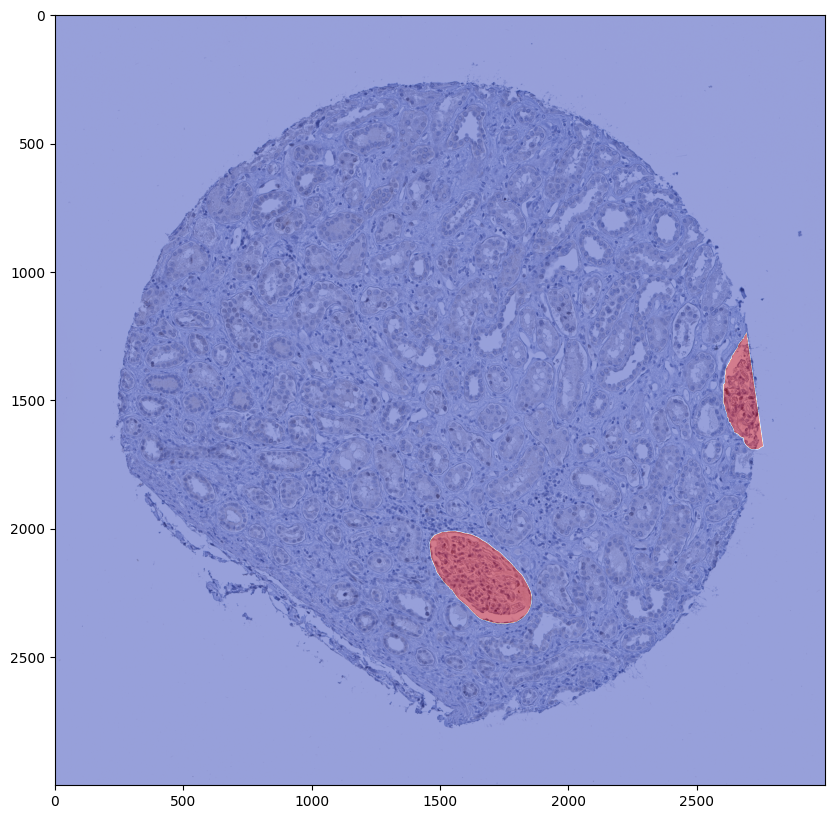

In [129]:
plt.figure(figsize=(10,10))
plt.imshow(img_1)
plt.imshow(mask_1, cmap='coolwarm', alpha=0.5)

In [118]:
ORGANS = ['kidney', 'largeintestine', 'lung', 'prostate', 'spleen']

In [124]:
train_df['organ']

0            prostate
1            prostate
2              spleen
3                lung
4              spleen
            ...      
346            kidney
347            kidney
348    largeintestine
349            kidney
350    largeintestine
Name: organ, Length: 351, dtype: object

In [134]:
#for i in range(len(train_df)):
if train_df['organ']['kidney'] == ORGANS[0]:
    plt.figure(figsize=(10,10))
    plt.imshow(img_1)
    plt.imshow(mask_1, cmap='PuOr', alpha=0.5)

KeyError: 'kidney'

In [3]:
color2index = [
        [255, 255, 255],
        [0,     0, 255],
        [0,   255, 255],
        [0,   255,   0],
        [255, 255,   0],
        [255,   0,   0]]

In [4]:
def rgb2mask(img):

    assert len(img.shape) == 3
    height, width, ch = img.shape
    assert ch == 3

    W = np.power(256, [[0],[1],[2]])

    img_id = img.dot(W).squeeze(-1) 
    values = np.unique(img_id)

    #mask = np.zeros(img_id.shape)
    mask = cv2.imread(TRAIN_ANNOT + '/62.png')

    for i, c in enumerate(values):
        try:
            mask[img_id==c] = color2index[tuple(img[img_id==c][0])] 
        except:
            pass
    return mask

In [5]:
img1 = cv2.imread(TRAIN_IMAGES + '/62.tiff')

In [6]:
img1.shape

(3000, 3000, 3)

In [7]:
mask = rgb2mask(img1)

[ WARN:0@16.561] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jiehyun/kaggle/input/hubmap-organ-segmentation/train_annotations/62.png'): can't open/read file: check file path/integrity


In [14]:
mask_new = Image.open(binary_masks +'/62.png')

In [18]:
loadedmask = asarray(mask_new)

In [23]:
loadedmask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
np.unique(loadedmask)

array([  0, 255], dtype=uint8)

In [22]:
loadedmask[loadedmask == 255] = 2

ValueError: assignment destination is read-only